# A quick introduction to Linear Regression using Python

##### Import Packages

In [4]:
# data processing
import pandas as pd

# modeling
from sklearn.linear_model import LinearRegression

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

Read the wine quality data and perform linear regression using all numeric features to predict the wine quality.

##### Step 1: Read data into a dataframe.

In [8]:
df_wine = pd.read_csv('../data/winequality.csv', index_col=0)

df_wine.shape

(6497, 13)

In [10]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


##### Step 2: Check column types.

In [11]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine type                object
dtype: object

##### Step 3: Isolate numeric columns. We will use all variables of type float as predictors in our model.

In [13]:
x_vars = df_wine.columns[:-2]

x_vars

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

##### Step 4: Create a linear regression object.

In [14]:
linreg = LinearRegression()

##### Step 5: Fit a regression model using these predictors. Use `quality` as the target variable.

In [15]:
X = df_wine[x_vars]
y = df_wine.quality

len(X), len(y)


(6497, 6497)

In [16]:
linreg.fit(X,y)

LinearRegression()

##### Step 6: View (print) intercept and coefficient values.

In [17]:
linreg.intercept_

55.76274961173719

In [18]:
linreg.coef_

array([ 6.76839156e-02, -1.32789221e+00, -1.09656648e-01,  4.35587507e-02,
       -4.83713531e-01,  5.96988830e-03, -2.48129841e-03, -5.49669422e+01,
        4.39296072e-01,  7.68251760e-01,  2.67030009e-01])

Combine coefficients with the column names.

In [22]:
list(zip(x_vars, linreg.coef_))

[('fixed acidity', 0.06768391557152885),
 ('volatile acidity', -1.3278922111894895),
 ('citric acid', -0.10965664815795159),
 ('residual sugar', 0.04355875074070319),
 ('chlorides', -0.483713530686071),
 ('free sulfur dioxide', 0.005969888299277193),
 ('total sulfur dioxide', -0.002481298408366195),
 ('density', -54.96694221961945),
 ('pH', 0.43929607193863707),
 ('sulphates', 0.7682517601447487),
 ('alcohol', 0.2670300088387697)]

##### Create a dataframe and store the results (parameters and coefficients) into it.

In [30]:
df_coeff = pd.DataFrame(columns=['feature','coeff'])

df_coeff['feature'] = x_vars
df_coeff['coeff'] = linreg.coef_

df_coeff

,feature,coeff
0,fixed acidity,0.067684
1,volatile acidity,-1.327892
2,citric acid,-0.109657
3,residual sugar,0.043559
4,chlorides,-0.483714
5,free sulfur dioxide,0.005970
6,total sulfur dioxide,-0.002481
7,density,-54.966942
8,pH,0.439296
9,sulphates,0.768252


_Note: All of these features have different means and variances. In order to compare the coefficients across features, we must either standardize the data first or calculate standardized coefficients._

##### Step 7: Make predictions and store them in the same dataframe (as a new column).

In [33]:
df_wine['preds'] = linreg.predict(X)

df_wine[['quality', 'preds']].head()

,quality,preds
0,6,5.556809
1,6,5.281311
2,6,5.879632
3,6,5.697990
4,6,5.697990


In [35]:
df_wine.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

##### Step 8: Plot the actuals (wine quality) versus predicted.

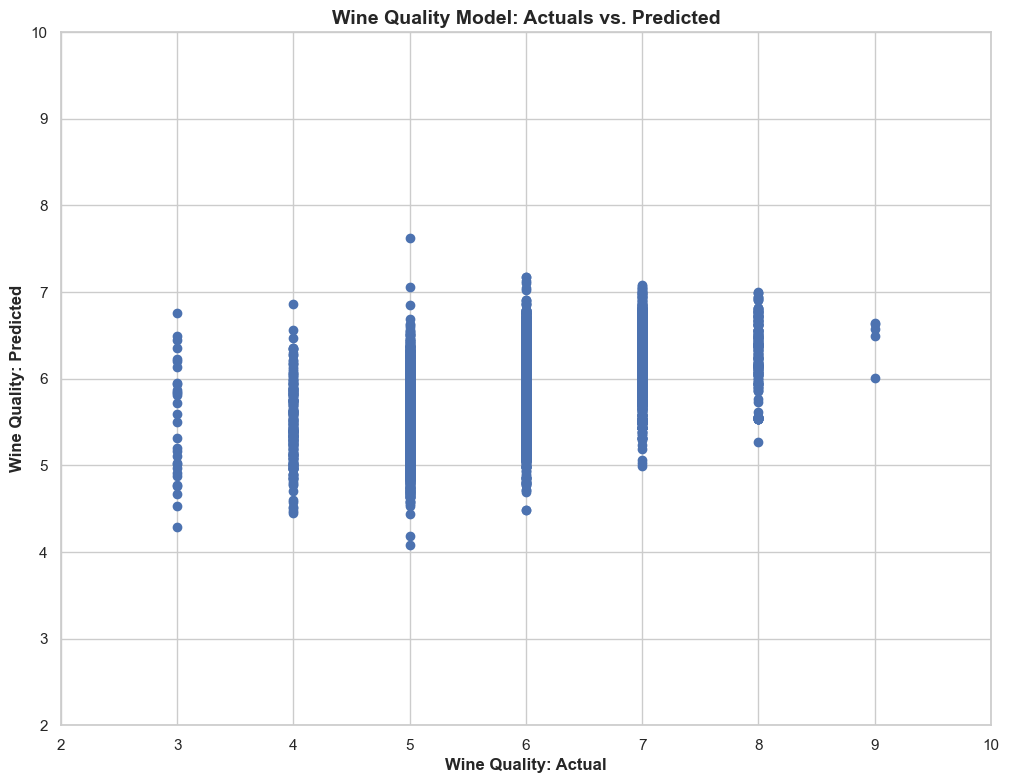

In [36]:
sns.set(style='whitegrid')
plt.figure().set_size_inches(12, 9)

plt.scatter(df_wine.quality, df_wine.preds)

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.xlim([2, 10])
plt.ylim([2, 10])

plt.xlabel('Wine Quality: Actual', fontsize=12, weight='semibold')
plt.ylabel('Wine Quality: Predicted', fontsize=12, weight='semibold')
plt.title('Wine Quality Model: Actuals vs. Predicted', fontsize=14, weight='semibold')
plt.show();

##### Coefficient of determination: R squared

In [37]:
from sklearn.metrics import r2_score

r2_score(df_wine.quality, df_wine.preds)

0.29213688504020463

##### Mean Squared Error (MSE)

In [39]:
from sklearn.metrics import mean_squared_error as mse

mse(df_wine.quality, df_wine.preds)

0.5397154672783371

##### Forward selection

In [ ]:
sorted_vars = 

In [ ]:
for i in range(len(sorted_vars)):
    _x_vars = sorted_vars[:i+1]
    X = df_wine[_x_vars]
    print(f'Model with {i+1} predictors')
    
    _preds = linreg.fit(X, y).predict(X)
    
    _adj_r2 = 1 - (1 - r2_score(df_wine.quality, _preds)) * \
            (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1)
    
    print(f'\tMSE: {mean_squared_error(y, _preds):.3f}, Adj. R-squared: {_adj_r2:.3f}')

**Exercise:** Use [`statsmodels` package](https://www.statsmodels.org/stable/index.html) to build a linear regression model using this dataset.